In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def find_csv( dataset_name, epsilon, e1_r, e2_r):
    results_path ="../our_results"
    # Define the file name pattern
    pattern = f"{dataset_name}_{epsilon:.2f}_{e1_r:.2f}_{e2_r:.2f}_*.csv"

    # Construct the full path pattern
    full_pattern = os.path.join(results_path, pattern)
    
    # Use glob to find matching files
    matching_files = glob.glob(full_pattern)
    ours =  matching_files[0]
    
    
    base =f"{dataset_name}_*.csv"
    pattern = os.path.join("../baselines", base)
    
    # Use glob to find matching files
    files = glob.glob(pattern)
    baseline = files[0]

    return ours, baseline


In [2]:

def plot(csv_files, baseline, N):
    metrics = ['nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel']
    our_params = pd.DataFrame(columns=['eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    for eps in csv_files.keys():
        # Read CSV file into a DataFrame
        df = pd.read_csv(csv_files[eps])
        df1 = df[df['N'] == N]
        concat = df1.groupby('N').mean().reset_index()
        our_params = pd.concat([our_params, concat], ignore_index=True)

  
    df2 = pd.read_csv(baseline)
    baseline = df2.groupby('eps').mean().reset_index()
    print(baseline)

    fig, axes = plt.subplots(7, 6, figsize=(20, 3))

    for metric, ax in zip(metrics, axes.T):

        # Plot the line for the average NMI
        ax.plot(our_params['eps'], our_params[metric], label="predicted params", marker='o', linestyle='-')
        ax.set_title(metric)
        ax.set_xlabel('epislon') 
        ax.plot(baseline['eps'], baseline[metric], label="default", marker='o', linestyle='-')
        ax.legend()


        # Customize the plot
    #     plt.title('Average NMI per eps')
#         ax.xlabel('epsilon')
#         ax.ylabel(metric)
        ax.legend()
        ax.grid(False)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [5]:


def plot(csv_files, baselines_files, params):
    datasets = ["Bitcoin", "Chamelon"]

    metrics = ['nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel']
    our_params = pd.DataFrame(columns=['data', 'eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    baselines = pd.DataFrame(columns=['data', 'eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    for name in datasets:
        data = csv_files[name]
        param = params[name]
        for eps in data.keys():
            df = pd.read_csv(data[eps])
            df1 = df[df['N'] == param[eps][0]]
            concat = df1.groupby('N').mean().reset_index()
            concat['data']=name
            our_params = pd.concat([our_params, concat], ignore_index=True)
            

         
        df2 = pd.read_csv(baselines_files[name])
        concat2 = df2.groupby('eps').mean().reset_index()
        concat2['data']=name
        baselines = pd.concat([baselines, concat2], ignore_index=True)
        
        
    fig, axes = plt.subplots(len(metrics), len(datasets), figsize=(15, 20))
    
    # Plot each metric on a separate subplot
    for metric, ax_row in (zip(metrics, axes)):  
        for name, ax in zip(datasets, ax_row):
            dataset = our_params[our_params['data'] == name]
            baseline = baselines[baselines['data'] == name]


            ax.plot(dataset['eps'], dataset[metric], label="predicted params", marker='o', linestyle='-')
            ax.set_title(metric)
            ax.set_xlabel('epislon') 
            ax.plot(baseline['eps'], baseline[metric], label="default", marker='o', linestyle='-')
            ax.legend()
            ax.legend()
            ax.grid(False)
    plt.tight_layout()
    plt.show()


    
    
    
    
    
    

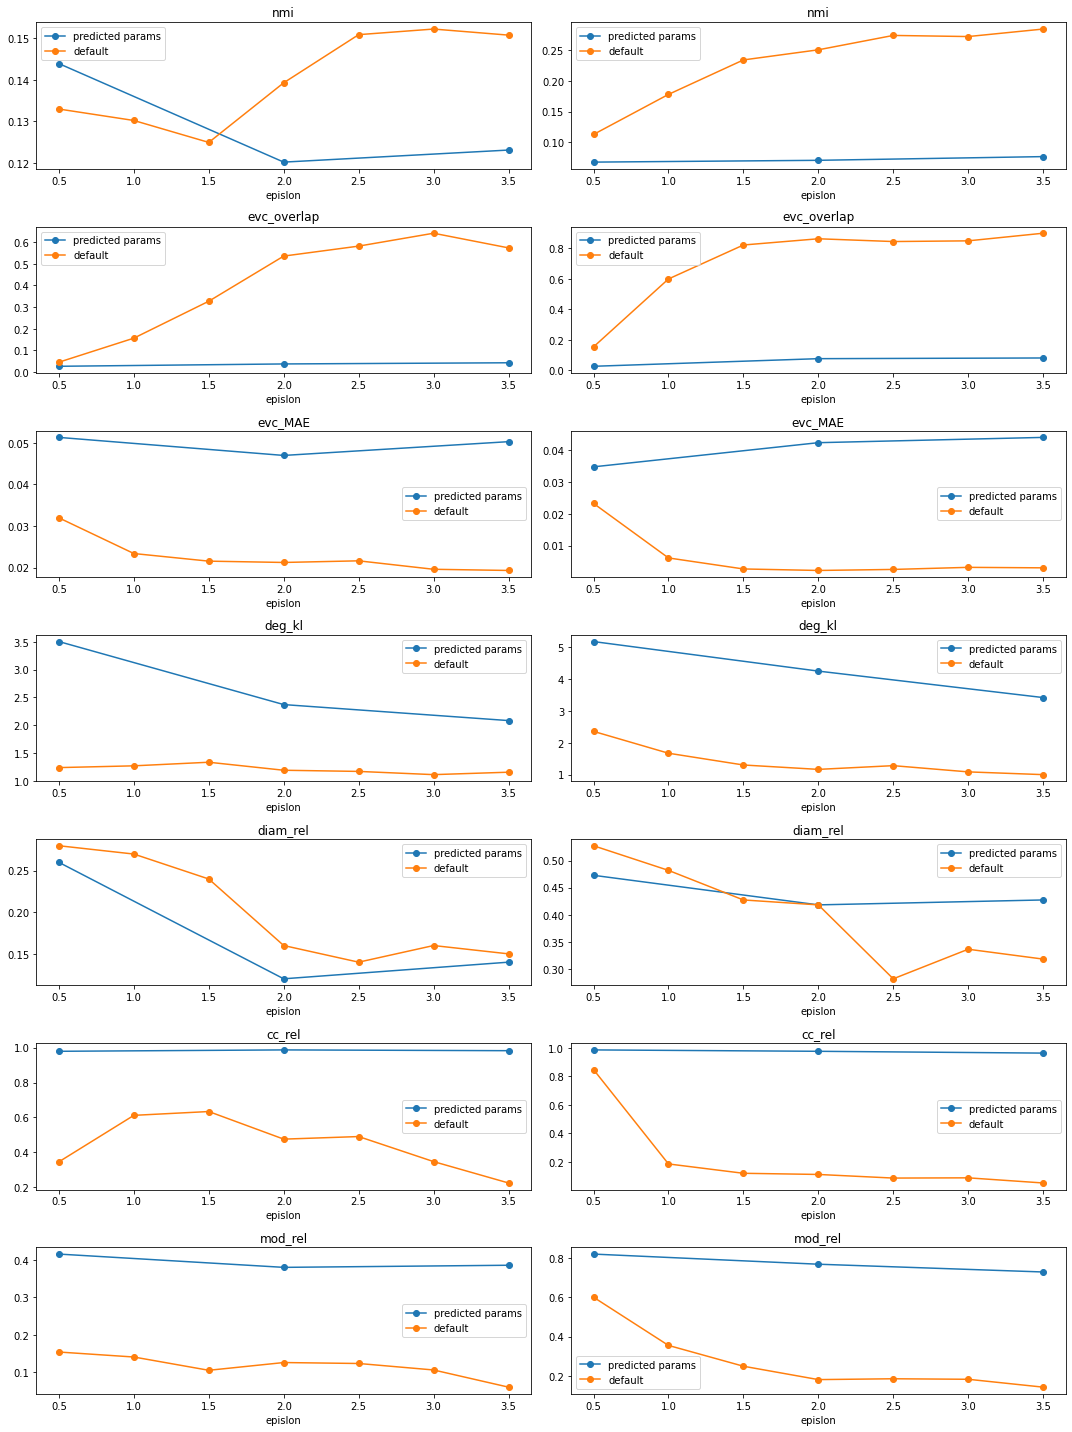

In [6]:
ours = {} # maps dataset  -> map of (e -> location)
baselines = {}
dataset = ["Bitcoin", "Chamelon"]
   
#fake numbers 
predicted_params ={
   "Bitcoin": {
        0.5: [5, .1, .1], #map e -> [N, e1, e2]
        2: [5, .1 , .1],
        3.5: [5, .1, .1]
    },
    "Chamelon": {
        0.5: [5, .1, .1], #map e -> [N, e1, e2]
        2: [5, .1 , .1],
        3.5: [5, .1, .1]
    },
     "Congress": {
        0.5: [5, .1, .1], #map e -> [N, e1, e2]
        2: [5, .1 , .1],
        3.5: [5, .1, .1]
    }
}


for data in dataset:
    if data not in ours:
        ours[data]={}
    for e in [0.5, 2, 3.5]:
        params = predicted_params[data][e]
        pred, baseline = find_csv(data, e, params[1] , params[2])
        baselines[data] = baseline
        ours[data][e] = pred
    
    
plot(ours, baselines, predicted_params)


